In [28]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import plotly.express as px
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

In [32]:
# Download the vader_lexicon resource
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...


True

In [33]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [34]:
df = pd.read_json('script-bag-of-words.json')

In [41]:
# Calculate sentiment scores for each character's dialogue
sia = SentimentIntensityAnalyzer()
df['sentiment'] = df['text'].apply(lambda x: sia.polarity_scores(' '.join(item['text'] for item in x))['compound'] if isinstance(x, list) else sia.polarity_scores(x)['compound'])

In [42]:
# Sort characters by sentiment score
df = df.sort_values('sentiment', ascending=False)

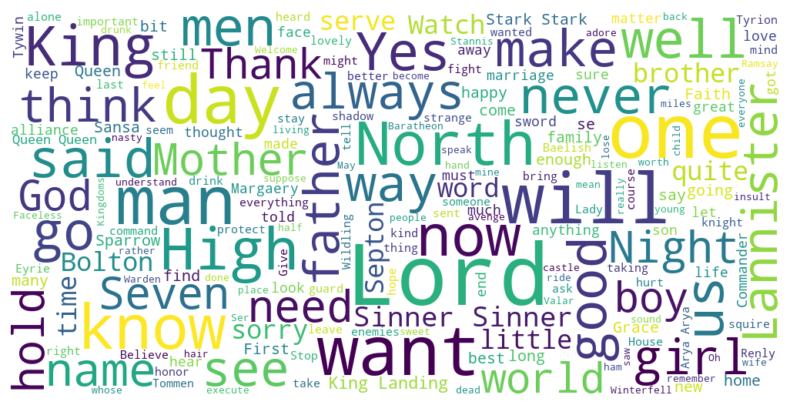

In [51]:
# Assuming 'text' is the column containing a list of dictionaries
text_data_list = df.iloc[0]['text']

# Extract the 'text' value from each dictionary
text_data = ' '.join(item['text'] for item in text_data_list)

# Generate the word cloud
wordcloud = WordCloud(width=1000, height=500, random_state=21, max_font_size=110, background_color='white').generate(text_data)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [53]:
# Embeddings and TSNE
cv = CountVectorizer(stop_words='english')
embeddings = cv.fit_transform(df['text'].apply(lambda x: ' '.join(item['text'] for item in x))).toarray()
embeddings = embeddings.astype('float64')

In [54]:

tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(embeddings)

F:\Anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

F:\Anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



[t-SNE] Computing 72 nearest neighbors...
[t-SNE] Indexed 73 samples in 0.016s...
[t-SNE] Computed neighbors for 73 samples in 0.079s...
[t-SNE] Computed conditional probabilities for sample 73 / 73
[t-SNE] Mean sigma: 23.582562
[t-SNE] KL divergence after 250 iterations with early exaggeration: 63.577141
[t-SNE] KL divergence after 1000 iterations: 0.574908


In [55]:
df['x'] = z.T[0]
df['y'] = z.T[1]

In [59]:
# Convert dictionaries in the 'text' column to strings
df['text_str'] = df['text'].apply(lambda x: ' '.join(item['text'] for item in x) if isinstance(x, list) else x)

# Plot an interactive scatter plot using Plotly Express
fig = px.scatter(df.head(25), x="x", y="y", color="text_str", size="sentiment",
                 hover_data=["sentiment"],
                 title="Character Sentiment and WordCloud Visualization")
fig.show()